<a href="https://colab.research.google.com/github/gerriemarx/shiny-disco/blob/master/NeuralNetwork/Neural_Network_Stock_Trading_TEMPLATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificail recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
symbol = 'MSFT'
timeframe = 'av-daily'
apikey = 'XNPEBPWDOFU4N5H9'
startdate = '2012-01-01'
enddate = '2022-08-11'

In [ ]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
df = web.DataReader(symbol, timeframe, api_key=apikey, start=startdate, end=enddate)
# Show the data
df

,open,high,low,close,volume
2012-01-03,26.5500,26.960,26.390,26.765,64731500
2012-01-04,26.8199,27.470,26.780,27.400,80516100
2012-01-05,27.3800,27.728,27.290,27.680,56081400
2012-01-06,27.5300,28.190,27.525,28.105,99455500
2012-01-09,28.0500,28.100,27.720,27.740,59706800
...,...,...,...,...,...
2022-08-05,279.1500,283.650,278.680,282.910,16774606
2022-08-08,284.0500,285.920,279.320,280.320,18757818
2022-08-09,279.6400,283.080,277.610,282.300,23405238
2022-08-10,288.1700,289.810,286.940,289.160,24687845


In [ ]:
# Get the number of rows and columns in the data set
df.shape

(2670, 5)

Text(0, 0.5, 'Close Price')

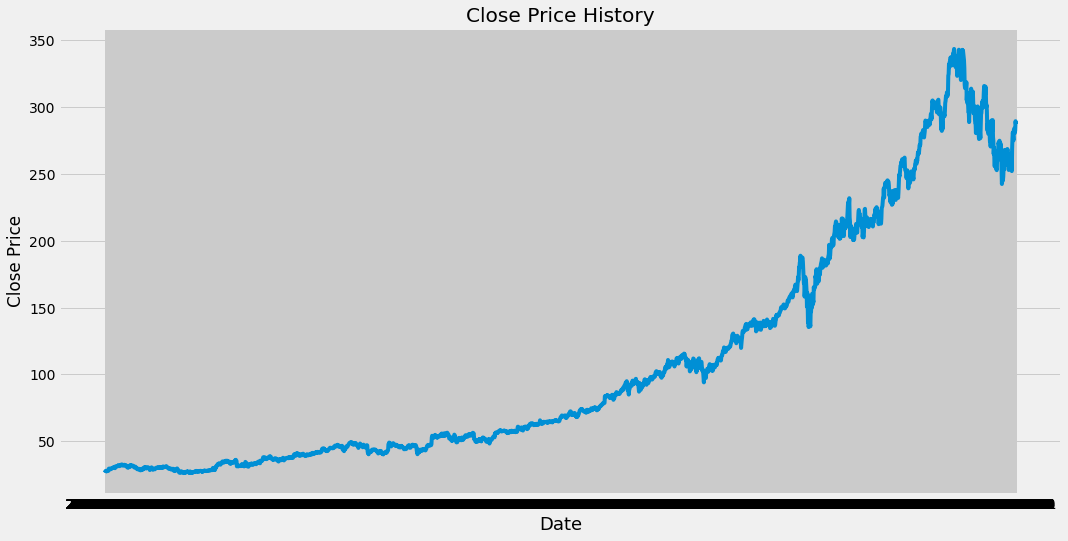

In [ ]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price')

In [ ]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2136

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00124708],
       [0.00325188],
       [0.00413588],
       ...,
       [0.80801288],
       [0.82967102],
       [0.82291469]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00124708, 0.00325188, 0.00413588, 0.00547768, 0.00432531,
       0.00464103, 0.00426217, 0.00514618, 0.00593547, 0.00595125,
       0.00587232, 0.00552504, 0.01054493, 0.01060807, 0.00937678,
       0.01007135, 0.00988192, 0.00902949, 0.01022921, 0.00997664,
       0.01111322, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.0130233 , 0.01329166, 0.01224979,
       0.01161836, 0.01551746, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.01613311, 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01801162, 0.0171434 , 0.01636989, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989013, 0.02020585,
       0.02045842, 0.01966913, 0.01840626, 0.01774326, 0.01749069,
       0.01775905, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153690724253324]

[array([0.00124708, 0.00325188, 0.00413588, 0.00547768, 0.00432531,
       0.00464103, 0.00426217, 0.00514618, 0.00593547, 0.00595125,
       0.00587232, 0.00552504, 0.0

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2076, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2076/2076 [==============================] - 61s 28ms/step - loss: 4.3822e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.524339313864262

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


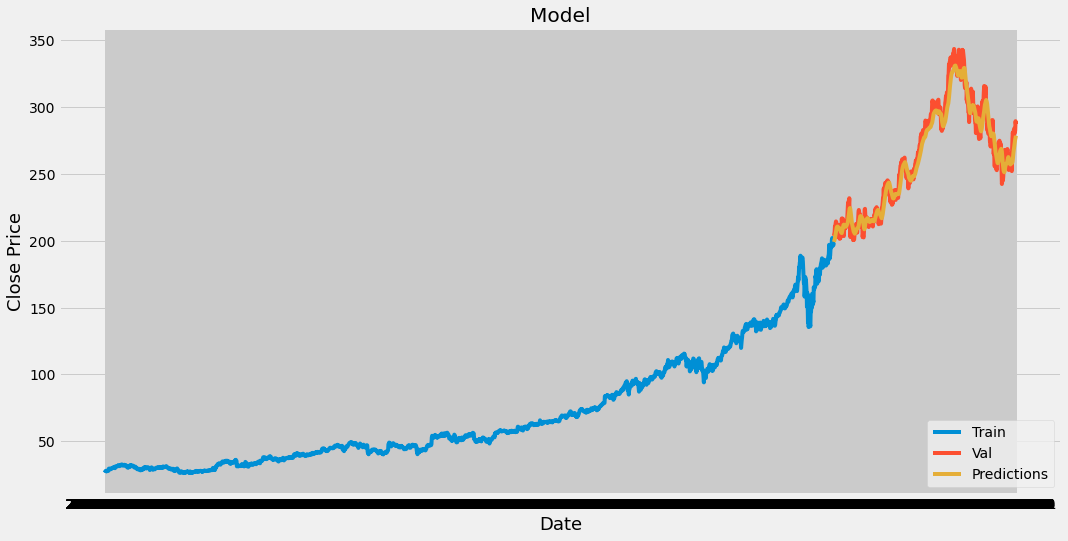

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,close,Predictions
2020-06-30,203.51,198.995972
2020-07-01,204.70,199.744446
2020-07-02,206.26,200.719589
2020-07-06,210.70,201.873383
2020-07-07,208.25,203.443344
...,...,...
2022-08-05,282.91,272.523041
2022-08-08,280.32,274.421143
2022-08-09,282.30,275.710297
2022-08-10,289.16,276.785980


In [ ]:
# Create a new dataframe
new_df = df.filter(['close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[279.63235]]


In [ ]:
apple_quote = web.DataReader(symbol, timeframe, api_key=apikey, start='2022-08-11', end='2022-08-11')
print(apple_quote['close'])

2022-08-11    287.02
Name: close, dtype: float64
